### Một số quiz về kiến thức Support Vector Machine ở link này: **[SUPPORT VECTOR MACHINE](https://programmerclick.com/article/1092740117/)**

**1. What is the fundamental idea behind Support Vector Machines?**"
+ SVM or Support Vector Machine is a linear model for classification and regression problems
+ It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: **The algorithm creates a line or a hyperplane which separates the data into classes**

**2. What is a support vector?**
+ Support vectors are the data points that lie closest. to the decision surface (or hyperplane) 
+ They are the data points most difficult to classify.
+ They have direct bearing on the optimum location.

**3. Why is it important to scale the inputs when using SVMs?**
+ Because Support Vector Machine (SVM) optimization occurs by minimizing the decision vector w, the optimal hyperplane is influenced by the scale of the input features and it's therefore recommended that data be standardized (mean 0, var 1) prior to SVM model training

4. Can an SVM classifier output a confidence score when it classifies an instance?
What about a probability?
+ An SVM classifier can output the distance between the test instance and the decision boundary, and you can use this as a confidence score. - (Bộ phân loại SVM có thể xuất ra khoảng cách giữa phiên bản thử nghiệm và ranh giới quyết định và bạn có thể sử dụng điều này làm điểm tin cậy.)
+  However, this score cannot be directly converted into an estimation of the class probability. - (Tuy nhiên, điểm số này không thể được chuyển đổi trực tiếp thành ước tính xác suất của lớp.)
+ Nếu bạn đặt **probability=True**  khi tạo SVM trong Scikit-Learn, thì sau khi đào tạo, nó sẽ hiệu chỉnh các xác suất bằng cách sử dụng Logistic Regression trên điểm số của SVM. Điều này sẽ thêm các phương thức dự đoán_proba () và dự đoán_log_proba () vào SVM.

5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?
+ The computational complexity of the primal form of the SVM problem is proportional to the number of training instances m, while the computational complexity of the dual form is proportional to a number between m2 and m3.
+ So if there are millions of instances, you should definitely use the primal form, because the dual form will be much too slow. - nếu có hàng triệu trường hợp, bạn chắc chắn nên sử dụng **primal form**, vì **dual form** sẽ quá chậm.
+ The dual problem is faster to solve than the primal when the number of training
instances is smaller than the number of features - Bài toán kép được giải nhanh hơn bài toán nguyên thủy khi số lần huấn luyện phiên bản nhỏ hơn số lượng tính năng

6. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the
training set: should you increase or decrease γ (gamma)? What about C?
+ There might be too much regularization. To decrease it, you need to increase gamma or C (or both).
+ Increasing gamma makes the bell-shape curve narrower, and as a result each instance's range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. - (Tăng gamma làm cho đường cong hình chuông hẹp hơn, và kết quả là phạm vi ảnh hưởng của mỗi trường hợp nhỏ hơn: ranh giới quyết định cuối cùng trở nên bất thường hơn, dao động xung quanh các trường hợp riêng lẻ. Ngược lại, một giá trị gamma nhỏ làm cho đường cong hình chuông rộng hơn, do đó các trường hợp có phạm vi ảnh hưởng lớn hơn và ranh giới quyết định kết thúc mượt mà hơn.)
+ Giá trị C nhỏ hơn dẫn đến đường rộng hơn nhưng vi phạm lề nhiều hơn.

### **8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.**

In [7]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris =load_iris()
X = iris['data'][:,(2,3)] # pental length, pental width
len(X)

150

In [8]:
y = iris["target"]

In [9]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
len(X)

100

In [10]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1/(C*len(X))
lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=100000, tol=-np.infty, random_state=42)

In [11]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
lin_clf.fit(X_scaler, y)
svm_clf.fit(X_scaler, y)
sgd_clf.fit(X_scaler, y)

print(f"LinearSVC: {lin_clf.coef_, lin_clf.intercept_}")
print(f"SVC:  {svm_clf.coef_, svm_clf.intercept_}")
print(f"SGDClassifier: {sgd_clf.coef_, sgd_clf.intercept_}")

LinearSVC: (array([[1.05364854, 1.09903804]]), array([0.28475098]))
SVC:  (array([[1.1203284 , 1.02625193]]), array([0.31896852]))
SGDClassifier: (array([[1.12087283, 1.02679408]]), array([0.319]))


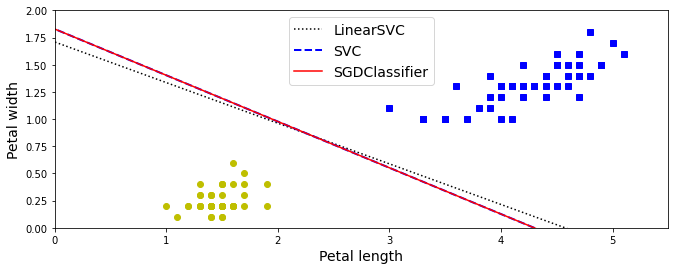

In [12]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]
 
# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])
 
# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
 
plt.show()

>+ We can see they are almost the same

### **9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?**

Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All (also called One-vs-the-Rest, OvR) strategy, so there's nothing special we need to do. Easy!

**Warning**: this may take a few minutes depending on your hardware.

In [13]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X= mnist["data"]
y = mnist['target'].astype(np.uint8)

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [15]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/home/tuandinh/Desktop/AI and Machine Learning/To-master-machine-learning/envML/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

+ Make predictions and measure the accurancy

In [16]:
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

### Using scaler for better result

In [17]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaler = scaler.fit_transform(X_test.astype(np.float32))

In [18]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaler, y_train)

In [ ]:
y_pred_with_scaler = lin_clf.predict(X_train_scaler)
accuracy_score(y_train, y_pred_with_scaler)

0.9214

**Có thể dùng gama = 'scale' để thay thê scho StandarScaler**

## 10. Train an SVM regressor on the California housing dataset.

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse